# 국민대, 파이썬, 데이터

# W12 pandas Primer

## Table of contents

1. Introduction to pandas
2. Data Structures
3. A Tour of pandas
4. Plotting Basics with pandas

In [73]:
from IPython.display import Image

---

# 1. Introduction to pandas

## A. History

- 2008년, AQR 투자 운용 회사(Capital Management)에 다니던 Wes McKinney가 개발 시작
- 2009년, 오픈 소스로 공개
- 2016.05, 0.18.1 버전

## B. Definition

- https://github.com/pydata/pandas
- http://pandas.pydata.org
- pandas: **Panel Data**의 약자
    - 계량 경제학에서 주로 쓰이는 용어
    - **횡단면 데이터**(개별 단위의 데이터를 **한 시점**에 모은 것) + **시계열 데이터**(특정 개별 주체의 데이터를 **여러 시점**에서 모은 것)
        - 예) 개별 기업의 주식 가격을 모은 것이 횡단면 데이터, 한 기업의 주가를 여러 기간에 걸쳐 기록하면 시계열 데이터이다.
    - pandas라는 이름을 Panel Data에서 가져왔다는 것에서 알 수 있듯, 금융 회사에 다니고 있었던 Wes McKinney는 금융 데이터를 분석하기에 적합하고 통합적인 기능을 제공하는 도구를 원함
- Official documentation에는 모두 소문자(pandas)로 사용하고 있으므로 이 문서에도 pandas로 사용

## C. Installation

```bash
$ pip install pandas
```

## D. Coding Convention

```python
import pandas as pd
```

In [141]:
# NumPy and pandas
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

# Set pandas options
pd.set_option('display.notebook_repr_html', True)  # 기본값입니다. False로 하면 DataFrmae의 border=0이 됩니다.
pd.set_option('display.max_columns', 10)  # 10 이상 넘어가면 '...' 으로 표시됩니다.
pd.set_option('display.max_rows', 10)

---

# 2. Data Structures

## A. What is Data Structure

- pandas를 공부하기 전에 먼저 Data Structure라는 것을 간단히 살펴보도록 하겠습니다. pandas의 중요한 객체인 Series, DataFrame이 바로 Data Structure이기 때문입니다.
- 컴퓨터 공학을 전공하셨거나 관심이 있는 분은 '자료구조' 라는 책을 본적이 있을 겁니다.
- Data Structure가 그 '자료구조'입니다.

- Data Structure
    - Data의
    - 효과적인 운영을 위해
    - Data를 저장하고 (Storing or Collecting)
    - 관리/정렬/구조화/정렬/준비하는 (Organising)
    - 그릇
- Data를 저장할 수 있는 그 어떤 것도 Data Structure가 될 수 있습니다.
    - Integer, Float, Boolean, Char etc.
    - 이것을 **Primitive Data Structure**라고 부릅니다.
    - 그 외에 **Non-Primitive Data Structure**가 있습니다.

In [75]:
Image(url='http://4.bp.blogspot.com/-TPH8lzMOP_s/VpASXNKdeNI/AAAAAAAAIAA/zsH9Ixjx0G0/s1600/data%2Bstructure.jpg')

위 그림에서 Data Stucture의 분류 체계를 알 수 있습니다. 우리는 모든 요소들에 대해 보지는 않겠지만 데이터를 담는 그릇의 종류에는 여러가지가 있음을 알 수 있습니다.

## B. Why Data Structure is important in pandas

- pandas는 Data Manipulation을 돕는 고수준의 Data Structure를 제공하기 때문입니다.
- 하지만 pandas 자체만으로는 Data Science Toolkit이라고 말할 수 없습니다. 데이터로부터 특정 결론을 도출하기 위해서는 NumPy, matplotlib 등의 패키지를 추가적으로 이용해야 합니다.

## C. Data Structures with Languages

### 1) Javscript

- String
- Array
- Stacks etc.

### 2) Python Data Structures

- List/Tuple
- Dictionary

### 3) NumPy Data Structures

- 수치 계산(Numeriacal Computing)을 하는데 있어 매우 중요한 역할을 하는 패키지입니다.
- numpy.ndarray
- 아래 그림을 보면 알 수 있듯 numpy의 array는 데이터를 담는 그릇의 역할을 맡고 있습니다.
- 다차원 배열이라 indexing과 slicing이 다소 헷갈리는 부분이 있는데, 아래 그림을 보며 학습해보면 좋겠습니다.

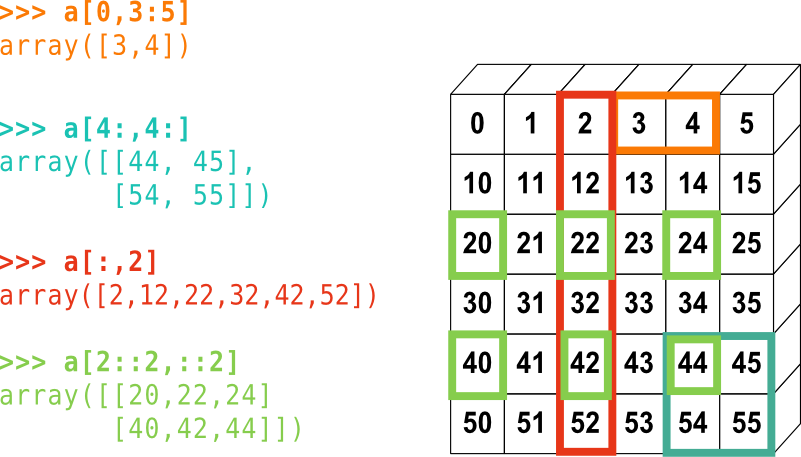

In [76]:
Image(filename='images/numpy_indexing.png')

### 4) pandas Data Structures

Dimensions|Name|Path|Description
--|--|--
1|Series|pandas.Series|1D labeled homogeneously-typed array
2|DataFrame|pandas.DataFrame|General 2D labeled, size-mutable tabular structure with potentially homogeneouly-typed columns
3|Panel|pandas.Panel|General 3D labeled, also size-mutable array

pandas의 Data Structure는 세 가지가 있습니다. 거의 대부분 이용할 것은 Series와 DataFrame입니다. 각각 1차원과 2차원 객체입니다. 이 객체를 통해 데이터를 수집하고 Organizing할 수 있는 것입니다.

자료 구조(Data Structure)를 다루는 건 쉽지 않습니다. 다만 여기서는 pandas에서 주로 사용하게 될 Data Structure인 Series와 DataFrame을 공부하기 전에 개념을 얇게라도 알고 갈 필요는 있습니다.

---

# 3. A Tour of pandas

pandas에서 대부분의 시간을 할애할 대상은 **Series, DataFrame**입니다. Series와 DataFrame에 대해 감을 익혀보도록 하겠습니다.

### 1) Series

#### Creation

pandas의 가장 기본이 되는 Data Structure입니다. NumPy Array와 흡사하지만 NumPy의 Array와는 다르게 **index가 있다는 것이 특징**입니다. List/Tuple/np.array로 쉽게 Series 객체를 만들 수 있습니다.

In [77]:
a = Series(['a', 'b', 'c', 'd'])  # List
a

0    a
1    b
2    c
3    d
dtype: object

In [78]:
a = Series(('a', 'b', 'c', 'd'))  # Tuple
a

0    a
1    b
2    c
3    d
dtype: object

In [79]:
a = Series(np.array(['a', 'b', 'c', 'd']))  # np.array
a

0    a
1    b
2    c
3    d
dtype: object

다만 NumPy의 array를 이용할 경우에는 다차원 배열로 만들면 안됩니다. Series 객체는 1 Dimension만 가능합니다.

In [80]:
a = Series(np.array([['a', 'b'], ['c', 'd']]))
a

Exception: Data must be 1-dimensional

Series 객체를 출력해보면 두 개의 컬럼이 나타납니다. 각 컬럼의 내용은 아래와 같습니다. pandas는 Index Label을 0부터 시작해 자동으로 부여해주고 있습니다.

첫 번쨰 컬럼|두 번째 컬럼
--|--
Index Label|Series 객체의 Value

#### Lookup

Series 객체의 Value에 접근하는 방법은 아래처럼 Indexing을 하면 Value을 가져올 수 있습니다.

In [81]:
a[2]

'c'

두 개의 값을 한 꺼번에 가져오기 위해 List or Tuple 형태로 만들어 Index 번호를 가지고 해당 Value를 가져올 수 있습니다.

In [82]:
a[[1, 3]]

1    b
3    d
dtype: object

이번에는 Slicing을 해볼까요?!

In [83]:
a[1:3]

1    b
2    c
dtype: object

#### User-defined index

pandas에서 자동으로 만들어주는 index 말고 직접 index label을 지정해줄수도 있습니다.

In [84]:
b = Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
b

a    1
b    2
c    3
d    4
dtype: int64

In [85]:
b['b']

2

In [86]:
b[['b', 'd']]

b    2
d    4
dtype: int64

In [87]:
b['b': 'd']

b    2
c    3
d    4
dtype: int64

#### zero-based index도 가능

In [88]:
b[[1, 3]]

b    2
d    4
dtype: int64

즉, zero-based index로 원하는 값을 가져올수도 있고 특정 Index Label로 가져올수도 있습니다. 아래처럼 Index 만을 가져올수 있으며 이 떄는 Index 객체를 반환해줍니다.

In [89]:
b.index

Index(['a', 'b', 'c', 'd'], dtype='object')

#### Series로 Time Series 다루기

pandas로 데이터를 다룰 때 많은 경우 time series를 다루게 됩니다. 위에서 배운 것을 토대로 index에 날짜를 넣어보도록 하겠습니다. 날짜의 경우 일일이 입력하지 않고 pandas의 date_range() 함수를 이용해보겠습니다.

In [177]:
dates = pd.date_range('2016-05-01', '2016-05-07')
dates

DatetimeIndex(['2016-05-01', '2016-05-02', '2016-05-03', '2016-05-04',
               '2016-05-05', '2016-05-06', '2016-05-07'],
              dtype='datetime64[ns]', freq='D')

**DatetimeIndex**은 date/time을 나타내는 pandas Index 객체입니다. 이를 만들기 위해 date_range()라는 함수를 사용했습니다.

Series 객체를 통해 위에서 만든 Datetime 데이터가 있는 Index에 Value를 추가해보도록 하겠습니다.

In [91]:
tmp1 = Series([80, 92, 82, 85, 97, 84, 78], index=dates)
tmp1

2016-05-01    80
2016-05-02    92
2016-05-03    82
2016-05-04    85
2016-05-05    97
2016-05-06    84
2016-05-07    78
Freq: D, dtype: int64

**Freq: D**라고 각 날짜간의 간격이 Daily라는 정보도 함께 표현해주며 각 Index에 해당하는 Value의 Data Type이 integer라는 것도 보여주고 있습니다.

이번에는 위 일주일 간의 데이터의 평균을 구해보겠습니다. 지금은 의미가 없는 숫자 데이터이지만 매일 특정 내용으로 위와 같은 값이 들어올 때 한 주의 평균을 구하는 것은 기본적인 데이터 분석일 것이라 생각됩니다. NumPy에서 제공하는 통계 함수는 pandas.Series에 적용할 수 있습니다. 아래와 같이 평균값을 내보도록 하겠습니다.

In [92]:
tmp1.mean()

85.428571428571431

NumPy의 mean() 함수를 이용해서 아래와 같이 직접 평균값을 구할수도 있습니다.

In [93]:
np.mean(tmp1)

85.428571428571431

소수점 이하 자리수가 뭔가 불편해 보입니다.

In [94]:
np.around(tmp1.mean(), decimals=0)  # around or round: 반올림, ceil: 올림, floor: 내림

85.0

In [95]:
np.around(tmp1.mean(), decimals=-1)

90.0

#### Arithematic Operation(+, -, /, *, ...)

Series간 수치 연산이 가능합니다. 이번에는 새로운 Series 객체를 만들고 두 Series 간 연산을 해보도록 하겠습니다.

In [96]:
tmp2 = Series(np.random.randint(60, 100, size=7), index=dates)
tmp2

2016-05-01    86
2016-05-02    79
2016-05-03    89
2016-05-04    98
2016-05-05    85
2016-05-06    85
2016-05-07    75
Freq: D, dtype: int64

In [97]:
diff_tmps = tmp1 - tmp2
diff_tmps

2016-05-01    -6
2016-05-02    13
2016-05-03    -7
2016-05-04   -13
2016-05-05    12
2016-05-06    -1
2016-05-07     3
Freq: D, dtype: int64

#### Lookup

In [98]:
diff_tmps['2016-05-03']

-7

In [99]:
diff_tmps['2016/05/03']

-7

In [100]:
diff_tmps['2016.05.03']

-7

In [101]:
diff_tmps['05.03.2016']

-7

위에가 가능한 이유가 Index Label에 들어가 있는 값은 String이 아니라 DatetimeIndex 객체로 만들어진 데이터이기 때문입니다. 아래를 보면 Dtype이 datetime인 것을 확인할 수가 있습니다.

In [102]:
diff_tmps.index

DatetimeIndex(['2016-05-01', '2016-05-02', '2016-05-03', '2016-05-04',
               '2016-05-05', '2016-05-06', '2016-05-07'],
              dtype='datetime64[ns]', freq='D')

In [103]:
diff_tmps[3]

-13

### 2) DataFrame

Series 객체가 index label이 있는 Single Array였다면 DataFrame은 Series 객체가 두 개 이상있는 객체라고 생각하시면 됩니다. 가까이로는 엑셀의 표 혹은 데이터베이스의 Table과 유사합니다.

#### Creation

In [104]:
quiz = DataFrame({
        'Math': tmp1,
        'Philosophy': tmp2
    })
quiz

,Math,Philosophy
2016-05-01,80,86
2016-05-02,92,79
2016-05-03,82,89
2016-05-04,85,98
2016-05-05,97,85
2016-05-06,84,85
2016-05-07,78,75


보는바와 같이 테이블 모양으로 데이터를 보여줍니다. 엑셀처럼 컬럼을 가지고 있습니다.

#### Column Lookup 1

Series 객체와 마찬가지로 원하는 값을 찾을 수 있습니다. 여기서는 컬럼의 이름 값을 기준으로 데이터를 가져올 수 있습니다.

In [105]:
quiz['Math']

2016-05-01    80
2016-05-02    92
2016-05-03    82
2016-05-04    85
2016-05-05    97
2016-05-06    84
2016-05-07    78
Freq: D, Name: Math, dtype: int64

In [106]:
type(quiz['Math'])

pandas.core.series.Series

컬럼의 순서를 바꿔 데이터를 가져올수도 있습니다.

In [107]:
quiz[['Philosophy', 'Math']]

,Philosophy,Math
2016-05-01,86,80
2016-05-02,79,92
2016-05-03,89,82
2016-05-04,98,85
2016-05-05,85,97
2016-05-06,85,84
2016-05-07,75,78


여기서 문제입니다. 특정 데이터를 찾을 때 Series 객체와 DataFrame 객체는 **미묘하게 차이**가 있습니다. 무엇일까요?

In [108]:
tmp1

2016-05-01    80
2016-05-02    92
2016-05-03    82
2016-05-04    85
2016-05-05    97
2016-05-06    84
2016-05-07    78
Freq: D, dtype: int64

In [109]:
tmp1[[1, 3]]

2016-05-02    92
2016-05-04    85
dtype: int64

In [110]:
quiz

,Math,Philosophy
2016-05-01,80,86
2016-05-02,92,79
2016-05-03,82,89
2016-05-04,85,98
2016-05-05,97,85
2016-05-06,84,85
2016-05-07,78,75


In [111]:
quiz['Math']

2016-05-01    80
2016-05-02    92
2016-05-03    82
2016-05-04    85
2016-05-05    97
2016-05-06    84
2016-05-07    78
Freq: D, Name: Math, dtype: int64

똑같이 '[]'에 기준되는 값을 넣었지만 반환되는 값은 Series의 경우 row에 해당하며 DataFrame의 경우 Column에 해당됩니다.

그렇다면 DataFrame의 row를 어떻게 가져올 수 있을까요? 우리가 이미 위에서 확인했지만 `quiz['Math']`의 반환값의 type은 Series 객체이기 때문에 아래와 같이 하면 됩니다.

In [112]:
quiz['Math'][[1, 3]]

2016-05-02    92
2016-05-04    85
Name: Math, dtype: int64

#### Column Lookup 2

DataFrame은 위와 같이 `quiz['컬럼이름']`으로 컬럼의 값을 찾을 수도 있지만 다른 방법도 제공을 합니다. 아래와 같이 속성처럼 사용할 수 있습니다.

In [113]:
quiz.Math

2016-05-01    80
2016-05-02    92
2016-05-03    82
2016-05-04    85
2016-05-05    97
2016-05-06    84
2016-05-07    78
Freq: D, Name: Math, dtype: int64

DataFrame의 컬럼과 인덱스 값도 알 수 있습니다. `quiz.columns`의 결과값은 아무리 Column이라고 해도 Index 객체로 반환됩니다. 즉 컬럼도 색인된 하나의 객체이기 Index 객체를 사용한 것입니다.

In [114]:
quiz.columns

Index(['Math', 'Philosophy'], dtype='object')

In [115]:
quiz.index

DatetimeIndex(['2016-05-01', '2016-05-02', '2016-05-03', '2016-05-04',
               '2016-05-05', '2016-05-06', '2016-05-07'],
              dtype='datetime64[ns]', freq='D')

#### Arithematic Operation

DataFrame 객체 간 연산도 가능합니다.

In [116]:
diff = quiz.Math - quiz.Philosophy
diff

2016-05-01    -6
2016-05-02    13
2016-05-03    -7
2016-05-04   -13
2016-05-05    12
2016-05-06    -1
2016-05-07     3
Freq: D, dtype: int64

이번에는 각 날짜마다 Math와 Philosophy의 평균을 구해보도록 하겠습니다. axis는 축을 나타내며 default는 0입니다. 0=column 1=row로 생각하면 됩니다.

In [117]:
avg = np.mean(quiz, axis=1)
avg

2016-05-01    83.0
2016-05-02    85.5
2016-05-03    85.5
2016-05-04    91.5
2016-05-05    91.0
2016-05-06    84.5
2016-05-07    76.5
Freq: D, dtype: float64

#### Adding

DataFrame 객체에 새로운 컬럼을 추가하는 것은 Series 객체를 하나 붙인다고 생각하면 됩니다.

In [118]:
quiz['avg'] = avg
quiz

,Math,Philosophy,avg
2016-05-01,80,86,83.0
2016-05-02,92,79,85.5
2016-05-03,82,89,85.5
2016-05-04,85,98,91.5
2016-05-05,97,85,91.0
2016-05-06,84,85,84.5
2016-05-07,78,75,76.5


#### Row Lookup - loc(), iloc(), ix()

위에서 DataFrame 객체의 Row 값을 가져오기 위해 컬럼을 선택하고 Slicing해서 가져오는 방법을 택했습니다. 아래와 같이요.

In [119]:
quiz['Math'][:]

2016-05-01    80
2016-05-02    92
2016-05-03    82
2016-05-04    85
2016-05-05    97
2016-05-06    84
2016-05-07    78
Freq: D, Name: Math, dtype: int64

위 방법은 특정 컬럼을 선택하고 그 컬럼의 모든 값을 가져오도록 하였습니다. 하지만 pandas는 하나의 Row에 해당하는 모든 값을 가져올 수 있도록 하는 함수도 제공을 하고 있습니다.

In [120]:
quiz.loc['2016-05-01']

Math          80.0
Philosophy    86.0
avg           83.0
Name: 2016-05-01 00:00:00, dtype: float64

In [121]:
quiz.iloc[0]

Math          80.0
Philosophy    86.0
avg           83.0
Name: 2016-05-01 00:00:00, dtype: float64

In [122]:
quiz.ix[0]

Math          80.0
Philosophy    86.0
avg           83.0
Name: 2016-05-01 00:00:00, dtype: float64

In [123]:
type(quiz.iloc[0])

pandas.core.series.Series

In [124]:
quiz.iloc[0].index

Index(['Math', 'Philosophy', 'avg'], dtype='object')

In [125]:
quiz.iloc[0].values

array([ 80.,  86.,  83.])

loc()와 iloc()의 차이점이 보이시나요? **loc()** 함수는 Index Label 값을 기준으로 반환해주며 **iloc()**는 Index 값을 기준으로 값을 반환해줍니다. 두 함수의 공통점은 Name으로 해당 Index Label Value를 보여주고 있다는 것입니다.

근데 좀 이상합니다. 하나의 Row를 선택했는데 Row 형태로 안보이고 수직으로 정렬되서 데이터를 보여주고 있습니다. 즉 DataFrame 객체의 Row를 Series로 반환해주고 있습니다. 이것을 **Pivoting** 했다고 표현합니다.

그렇다면 특정 Row를 선택하면 온전한 DataFrame 형태로 보고 싶을 때는 어떻게 할까요? 온전한 DataFrame 형태 즉, Table 형태로 보려면 아래와 같이 하면 됩니다. Filter로 생각하면 됩니다. 이 떄 반환값의 Type은 당연히 DataFrame 객체입니다.

In [126]:
quiz[quiz.index == '2016-05-03']

,Math,Philosophy,avg
2016-05-03,82,89,85.5


loc(), iloc() 함수의 경우 한 개의 Row만 선택해 가져올 때는 Series로 변환되지만 여러개를 가져올 때는 DataFrame 객체로 반환됩니다.

In [127]:
quiz.iloc[[0, 2, 3]]

,Math,Philosophy,avg
2016-05-01,80,86,83.0
2016-05-03,82,89,85.5
2016-05-04,85,98,91.5


In [128]:
quiz.iloc[[0, 2, 3]].Math

2016-05-01    80
2016-05-03    82
2016-05-04    85
Name: Math, dtype: int64

#### Filter

그렇다면 'Math'과목에서 특정 점수 이상을 받은 날은 어떻게 알 수 있을까요?

In [129]:
quiz.Math > 90

2016-05-01    False
2016-05-02     True
2016-05-03    False
2016-05-04    False
2016-05-05     True
2016-05-06    False
2016-05-07    False
Freq: D, Name: Math, dtype: bool

In [130]:
quiz[quiz.Math > 90]

,Math,Philosophy,avg
2016-05-02,92,79,85.5
2016-05-05,97,85,91.0


In [131]:
quiz[quiz.index < '2016-05-05']

,Math,Philosophy,avg
2016-05-01,80,86,83.0
2016-05-02,92,79,85.5
2016-05-03,82,89,85.5
2016-05-04,85,98,91.5


In [132]:
quiz[(quiz.index < '2016-05-05') & (quiz.Math > 90)]

,Math,Philosophy,avg
2016-05-02,92,79,85.5


---

# 4. Plotting Basics with pandas

In [143]:
# matplotlib plotting functions
import matplotlib.pyplot as plt

# We want our plots inline (jupyter notebook)
%matplotlib inline

우리가 이번에 살펴볼 패키지는 많이 사용되고 있는 시각화 패키지인 **matplotlib**입니다. pandas data structure를 받아 시각화 시켜줄 수 있는 훌륭한 도구입니다. 하지만 먼저 pandas의 DataFrame에서도 시각화 시킬 수 있는 방법부터 보도록 하겠습니다.

## A. pandas.DataFrame.plot()

위에서 만든 DataFrame인 quiz를 plotting 시켜보면 아래와 같습니다. matplotlib를 이용하지 않은 것처럼 보이지만 사실 DataFrame의 plot 함수 자체가 matplotlib를 이용하고 있는 것이기에 가능한 것입니다.

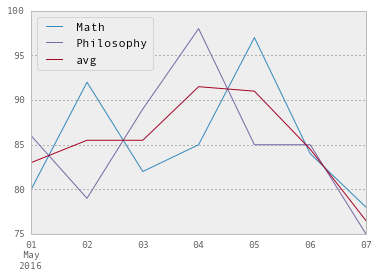

In [157]:
quiz.plot()

차트의 Title과 X축 라벨, Y축 라벨을 설정해보도록 하겠습니다.

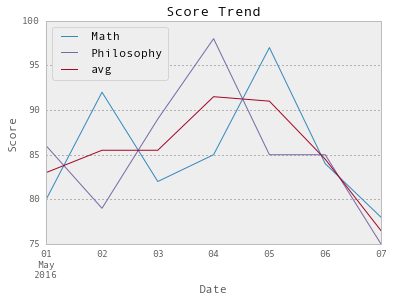

In [152]:
quiz.plot(title='Score Trend')
plt.xlabel('Date')
plt.ylabel('Score')

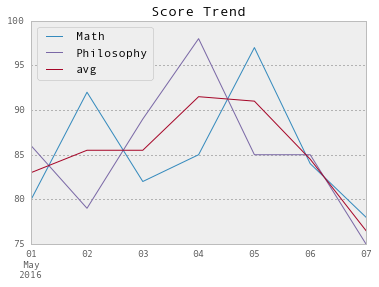

In [171]:
quiz.plot(title='Score Trend')

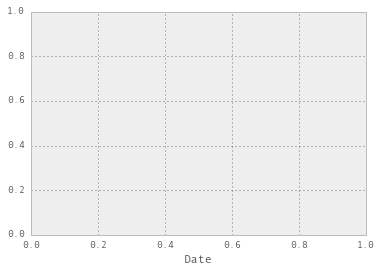

In [172]:
plt.xlabel('Date')

## B. matplotlib

이번에는 matplotlib.pyplot의 plot() 함수를 이용해 그려보도록 하겠습니다.

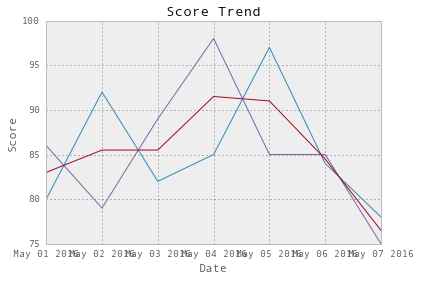

In [174]:
plt.title('Score Trend')
plt.xlabel('Date')
plt.ylabel('Score')
plt.plot(quiz)